In [2]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from pprint import pprint

def parse_data(data):
    data = list(map(lambda x: x['path'], data))
    return [list(map(lambda x: x['currentNodeId'], d)) for d in data]
    

data1 = json.load(open('berlin52_2018-04-13T09_21_17.705Z.json'))
data2 = json.load(open('berlin52_2018-04-18T20_36_44.966Z.json'))
data = data1 + data2

data = parse_data(data)

df = pd.DataFrame(data).fillna(0).astype(int)
indices = df.index[df[6] == 0].tolist()

colormap = ["#444444" for i in range(len(data))]
for index in indices:
    colormap[index] = "#AAAAAA"

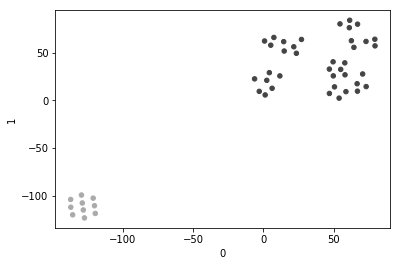

In [122]:
output = TSNE(n_components=2, perplexity=10).fit_transform(df)
pd.DataFrame(output).plot.scatter(x=0, y=1, c=colormap)

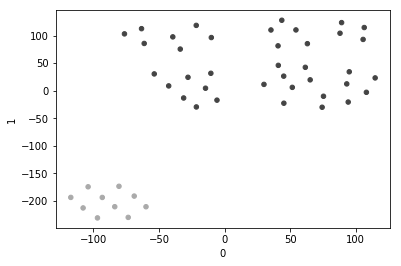

In [133]:
output = TSNE(n_components=2, perplexity=15).fit_transform(df)
pd.DataFrame(output).plot.scatter(x=0, y=1, c=colormap)

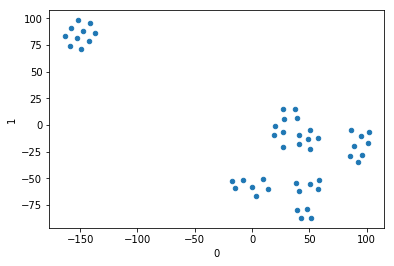

In [144]:
filtered_df = df[df[6] != 0]
output = TSNE(n_components=2, perplexity=10).fit_transform(df)
pd.DataFrame(output).plot.scatter(x=0, y=1)

    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18
0    1   2   7   9  13  16  18   3   8  12  15   4   6  17  19  10   5  20  11
2    1   4   6   8  13  14  19   3   5  12  16  18  10  15  20   9  11   2   7
3    1   4   6  10  12  16  18   3   8   9  15  20   5  17  19  11  13  14   7
5    1   2   6   9  13  15  17   4   7  11  18  20  10  14   3  12   8  16  19
6    1   3   5  10  13  14  19  20   6  12  15   4   8  17  18  16   9   7   2
9    1   2   7   9  13  14  19  20   6  10  17   3   8  15   5  16   4  12  11
10   1   2   6   9  13  15  17   4   7  11  18  20  10  14   3  12   8  16  19
11   1   2   7   9  12  15  18   3   8  11  14   4   6  16  20  17  19  10   5
13   1   2   5   9  13  14  19   3   8  10  15   4   6  12   7  17  20  16  18
15   1   4   5   8  13  14  19   3   9  10  15  18   6  12  20  16  11  17   7
16   1   2   6   8  12  15  19   3   9  10  17  18   5  16  20  11  13  14   4
17   1   3   7   8  12  15  19   4   5  10  16  20  

In [36]:
data1 = json.load(open('berlin52_2018-04-13T09_21_17.705Z.json'))
data2 = json.load(open('berlin52_2018-04-18T20_36_44.966Z.json'))
data = data1 + data2
data = list(map(lambda x: x['path'], data))

df_array = []
for run in data:
    run_array = []
    for node in run:
        chosenNodeId = node['chosenNodeId']
        highestPheromoneId = max(node['neighbours'], key=lambda x: x['pheromone'])['nodeId']
        run_array.append(1) if highestPheromoneId == chosenNodeId else run_array.append(0)
    df_array.append(run_array)

shorter = [x for x in df_array if len(x) == 6]
longer = [x for x in df_array if len(x) == 19]

def get_mean(arr):
    return sorted([sum(x) / len(x) for x in arr])

result = get_mean(df_array)
result_shorter = get_mean(shorter)
result_longer = get_mean(longer)


In [51]:
def plot_results(result_array):
    result_df = pd.DataFrame(result_array)
    result_df[1] = result_df.index
    result_df.plot.scatter(x=1, y=0)

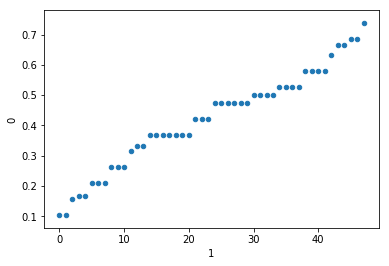

In [52]:
plot_results(result)

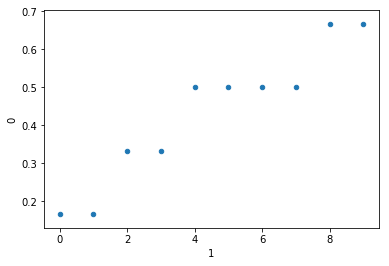

In [53]:
plot_results(result_shorter)

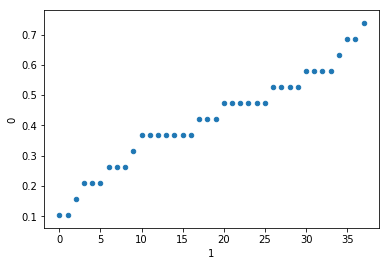

In [54]:
plot_results(result_longer)

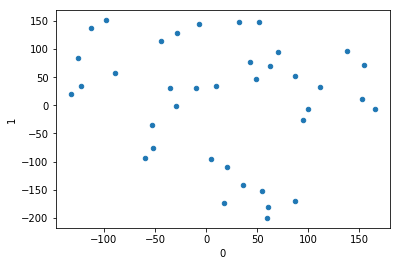

In [65]:
result_dataframe = pd.DataFrame(longer)

output = TSNE(n_components=2, perplexity=5).fit_transform(result_dataframe)
pd.DataFrame(output).plot.scatter(x=0, y=1)